In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import greatpy as great
from gprofiler import GProfiler
import pandas as pd
from numpy import nan

In [3]:
BinomP_and_HypergeomP=great.tl.calculBinomP_and_HypergeomP(
    test="../data/input/BinomP/genomic_region_test.bed",
    regdomFn="../data/input/BinomP/Regdom.out",
    Chr_sizeFn="../data/input/Regdom/Chr_size.txt",
    annotation="../data/input/BinomP/Ontologies.csv"
    )

In [4]:
BinomP_and_HypergeomP.head()

,GO_term,Binom p-value,Hypergeom p-value
GO:0045887,positive regulation of synaptic growth at neur...,5.17744e-13,3.87045e-03
GO:0044721,"protein import into peroxisome matrix, substra...",4.83812e-10,3.87045e-03
GO:0036250,peroxisome transport along microtubule,4.83812e-10,3.87045e-03
GO:0016561,"protein import into peroxisome matrix, translo...",6.31131e-10,7.71139e-03
GO:0047485,protein N-terminus binding,1.29450e-09,9.65115e-03


# Preprocessing of the data 

In [6]:
L=[]
f = open("../data/input/BinomP/genomic_region_test.bed")
cdc=f.readline()
while cdc != "": 
    cdc=cdc.split("\t")
    cdc=":".join(cdc)
    cdc=cdc.strip()
    L.append(cdc[3:])
    cdc=f.readline()

In [9]:
back=pd.read_csv("../data/input/BinomP/Regdom.out",sep="\t",comment="#",
                    names=["Chr", "Chr_Start", "Chr_End","Name","tss","Strand"],dtype={"Chr":"object", "Chr_Start":"int64", "Chr_End":"int64","Name":"object","tss":"int64","Strand":"object"})
back=list(back["Name"])

# Profile with GProfiler

In [10]:
gp = GProfiler(return_dataframe=True)
gp = gp.profile(organism='hsapiens',
            query=L,
            all_results=True,
            background=back,user_threshold=0.1)
gp=gp.loc[(gp["source"]=="GO:MF")|(gp["source"]=="GO:CC")|(gp["source"]=="GO:BP")]
gp

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
14,GO:CC,GO:0005801,cis-Golgi network,3.21896e-01,False,"""The network of interconnected tubular and cis...",66,22,2,23017,9.09091e-02,3.03030e-02,query_1,"[GO:0005794, GO:0043231]"
16,GO:CC,GO:0034687,integrin alphaL-beta2 complex,3.41207e-01,False,"""An integrin complex that comprises one alphaL...",2,22,1,23017,4.54545e-02,5.00000e-01,query_1,[GO:0008305]
19,GO:CC,GO:1990429,peroxisomal importomer complex,5.11577e-01,False,"""A protein complex responsible for transportin...",3,22,1,23017,4.54545e-02,3.33333e-01,query_1,[GO:1990351]
20,GO:CC,GO:0035868,alphav-beta3 integrin-HMGB1 complex,5.11577e-01,False,"""A protein complex that consists of an alphav-...",3,22,1,23017,4.54545e-02,3.33333e-01,query_1,[GO:0098797]
21,GO:MF,GO:0019002,GMP binding,5.24934e-01,False,"""Binding to GMP, guanosine monophosphate."" [GO...",2,22,1,23017,4.54545e-02,5.00000e-01,query_1,"[GO:0032561, GO:0043168]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,GO:BP,GO:0032268,regulation of cellular protein metabolic process,1.00000e+00,False,"""Any process that modulates the frequency, rat...",2297,22,2,23017,9.09091e-02,8.70701e-04,query_1,"[GO:0031323, GO:0044267, GO:0051246]"
5843,GO:BP,GO:0032103,positive regulation of response to external st...,1.00000e+00,False,"""Any process that activates, maintains or incr...",440,22,1,23017,4.54545e-02,2.27273e-03,query_1,"[GO:0009605, GO:0032101, GO:0048584]"
5844,GO:BP,GO:0032101,regulation of response to external stimulus,1.00000e+00,False,"""Any process that modulates the frequency, rat...",926,22,1,23017,4.54545e-02,1.07991e-03,query_1,"[GO:0009605, GO:0048583]"
5845,GO:BP,GO:0032091,negative regulation of protein binding,1.00000e+00,False,"""Any process that stops, prevents, or reduces ...",91,22,1,23017,4.54545e-02,1.09890e-02,query_1,"[GO:0043393, GO:0051100]"


# Add the GProfiler pvalue on the BinomP_and_HypergeomP df

In [13]:
val=[]
for i in BinomP_and_HypergeomP.index: 
    try : 
        val.append(float(gp.loc[gp["native"]==i]["p_value"]))
    except:
        val.append(nan)
BinomP_and_HypergeomP["Gprofile_p_val"]=val
BinomP_and_HypergeomP

,GO_term,Binom p-value,Hypergeom p-value,Gprofile_p_val
GO:0045887,positive regulation of synaptic growth at neur...,5.17744e-13,3.87045e-03,1.00000e+00
GO:0044721,"protein import into peroxisome matrix, substra...",4.83812e-10,3.87045e-03,1.00000e+00
GO:0036250,peroxisome transport along microtubule,4.83812e-10,3.87045e-03,1.00000e+00
GO:0016561,"protein import into peroxisome matrix, translo...",6.31131e-10,7.71139e-03,1.00000e+00
GO:0047485,protein N-terminus binding,1.29450e-09,9.65115e-03,1.00000e+00
...,...,...,...,...
GO:0050911,detection of chemical stimulus involved in sen...,1,2.68294e-01,NaN
GO:0004984,olfactory receptor activity,1,2.72402e-01,NaN
GO:0005652,nuclear lamina,1,2.64790e-02,1.00000e+00
GO:0005694,chromosome,1,3.31344e-01,1.00000e+00


# Plot the log of the p-value

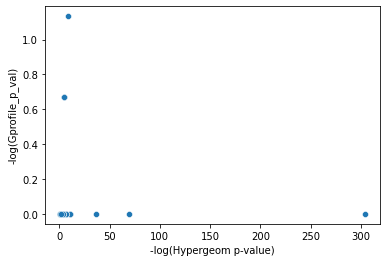

In [14]:
great.pl.scatterplot_of_p_val(BinomP_and_HypergeomP,"Hypergeom p-value","Gprofile_p_val")